# Community Detection using Girvan Newman Algorithm
### If we keep removing the edges which have the highest betweennes, the graph will become disconnected into two clusters 
***

Importing all the dependancies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

***
Lets write a function which returns the edge with the highest betweenness

In [2]:
def EdgeWithHighestBetweenness(G):#function returns the edge with the highest betweenness
    BetweennessDict = nx.edge_betweenness_centrality(G)
    BetweennessTuples = list(BetweennessDict.items())#Convert the disctionary into list of tuples
    BetweennessTuples.sort(key = lambda x:x[1],reverse=True)#sort the list of tuples based on the betweenness
    return BetweennessTuples[0][0]#return the edge with the highest betweenness

***
Now, let us implement the function which keeps removing the edges until the graph gets partitioned.

In [3]:
def GirvanAlgorithm(G):
    NodesList=list(nx.connected_components(G))#This function will give the list of nodes in each connected component
    l = len(NodesList)#Records the number of connected components in the graph, 1 when the graph is connected
    while(l==1):#We stop when the graph is split into two parts
        G.remove_edge(*EdgeWithHighestBetweenness(G))#We remove the Edge with the highest betweenness
        NodesList=list(nx.connected_components(G))#We re-compute the list   
        l = len(NodesList)#Re-computing the connected components
    return NodesList#Return a list of nodes in each connected component.

***
As simple as that!<br>
Now let's see if our code works!<br>
Let's test our code with the famous Zachary Karate Club data set.

In [4]:
KarateGraph = nx.read_gml('Datasets/karate.gml')

Let's visualise the graph first!

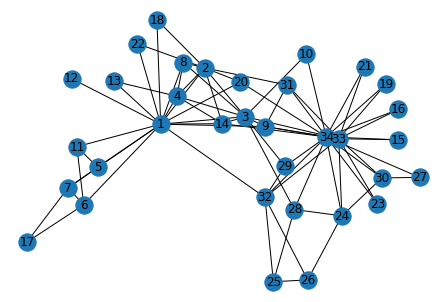

In [5]:
nx.draw(KarateGraph,with_labels=True)

In [7]:
Communities = GirvanAlgorithm(KarateGraph)
Communities=[[eval(x) for x in Community] for Community in Communities]
print("Communities:\n",Communities[0],"\n",Communities[1])

Communities:
 [4, 2, 22, 1, 14, 8, 11, 7, 13, 17, 12, 18, 6, 20, 5] 
 [33, 34, 9, 27, 28, 24, 30, 32, 26, 10, 23, 25, 21, 31, 15, 3, 16, 29, 19]


## Yes,It Worked!
<div class="alert alert-block alert-info">
<b>Conclusion:</b>If we keep removing the edges which have the highest betweenness,we will eventually have the graph divided into two communities
</div>